In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
# from astropy.io import ascii
import pandas as pd

# Now calulcate comb, envelope etc and bake in the new width produced by the adjustment that corresponds to a given blaze discrpancy

In [2]:

# wavelength = 0.635/3.4 #in um: IN IMMERSION bc /3.4
wavelength = 0.633#in um: not in immersion, test configuration of front reflection
# blazeangle = np.deg2rad(76)
blazeangle = np.deg2rad(76)

groovewidth = 42.43 # width of facets that create the slits in reflection
groovespacing = 71.43 #in um for L band ##this is pitch !!!!!
beamwidth = 10000#20000 #12400 #in um bc based on laser divergence, probably 12.4 um beam size without beam expander #. 2000um = 2mm ### 
inputangle = 76 #in degrees
inputangle = inputangle*np.pi/180 #in rad

outputangle_deg = np.linspace(-95,95,5000000)
outputangle_rad = outputangle_deg*np.pi/180

In [3]:
###Start by setting up array of all orders m
m_vector = np.arange(-135, 135, 1)
index=1
# m_vector.shape

###Now, calulate the diffraction angle for each order
diffraction_centers = np.arcsin(np.sin(inputangle)+index*(m_vector*wavelength/groovespacing))


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arcsin
  import sys


In [4]:
###Make a mask to get rid of NaNs aka where the grating no longer reflects orders at the far wings
mask = np.isfinite(diffraction_centers)

###Apply mask to orders array and corresponding diffracted angle array:
m_vector = m_vector[mask]
diffraction_centers = diffraction_centers[mask]

###Broadcast diffracted angle array to a column (transpose):
diffraction_column_vector = np.expand_dims(diffraction_centers, 1)

In [5]:
#argument for beam diffraction sinc function:
argBD = (beamwidth*np.pi/wavelength)*np.sin(outputangle_rad-diffraction_column_vector)
#Sinc function then is:
BeamDiffraction = (np.sin(argBD)/argBD)**2

n_orders = len(m_vector)


(0, 80)

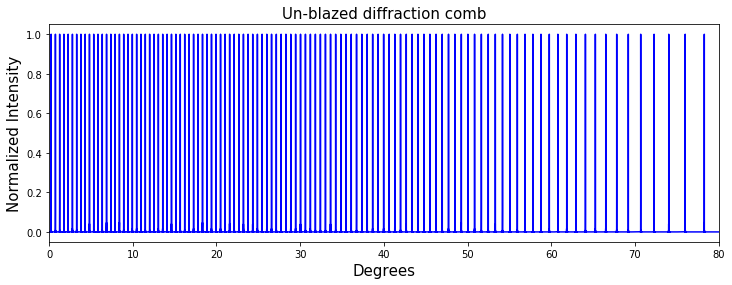

In [6]:
### Plot all the orders (the comb) in unblazed diffraction:
total_unblazed_diffraction = BeamDiffraction.sum(0) ######not sure what is happening here

# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

plt.figure(figsize=(12, 4))
plt.plot(outputangle_rad*180/math.pi,total_unblazed_diffraction,color = 'blue');
plt.xlabel('Degrees',fontsize = 15)
plt.title('Un-blazed diffraction comb',fontsize = 15)
plt.ylabel('Normalized Intensity',fontsize = 15)
# plt.plot(outputangle_rad*180/math.pi,BlazeEnvelope); ##may need to run whole code before this line is plottable
#plt.title('beam diffraction for m ={}'.format(m))
plt.xlim(0,80)



### Now add blaze and multiply comb by blaze envelope

In [7]:
# ########################################### Enable in notebook zooming:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()
# ###########################################

In [8]:
np.rad2deg(inputangle)

75.99999999999999

In [9]:
groovewidth

42.43

In [10]:
##account for the projection of the groove width being smaller at some alpha > 0

##if we want to use the geometrical projection
print(groovewidth)
print(90-np.rad2deg(inputangle))
print(np.cos(np.deg2rad(90)-inputangle))

groovewidth = groovewidth*np.cos(np.deg2rad(90)-inputangle)

##if we want to use the illuminated groove face (which is in principle very similar to the wdith of the geometrical projection)
## it is also worth noting that the 

groovewidth

42.43
14.000000000000014
0.9702957262759965


41.16964766589053

In [11]:
# %%html
# <img src="../grooveprojection.png" width=300></img>

In [12]:
##arg for blaze envelope sinc function:

argBEE = (groovewidth*np.pi/wavelength)*np.sin(outputangle_rad-blazeangle)

##sinc function to describe the blaze envelope:
BlazeEnvelopeE = (np.sin(argBEE)/argBEE)**2


In [13]:
## multiply blaze envelope (mine, denoted '-E', and Engman's) with unblazed comb of orders:
total_blazed_diffractionE = total_unblazed_diffraction * BlazeEnvelopeE


In [14]:
#To compare to a blaze envelope that does not include the projection, reset 'groovewdith' to original and calculate to plot
groovewidth = 42.43
argBEEX = (groovewidth*np.pi/wavelength)*np.sin(outputangle_rad-blazeangle)
BlazeEnvelopeEX = (np.sin(argBEEX)/argBEEX)**2
total_blazed_diffractionEX = total_unblazed_diffraction * BlazeEnvelopeEX

#could also do this for h with the complicated geomatry to show how h and the simple projection are the same at 
#littrow and increaasingly different as alpha deviates from blaze angle


In [15]:
#could also do this for h with the complicated geomatry to show how h and the simple projection are the same at 
#littrow and increaasingly different as alpha deviates from blaze angle

groovewidthH = 42.43
#the following decription was derived with Gully 02022022. Notes in lab notebook.
groovewidthH = groovewidthH*(np.sin(np.deg2rad(90)-inputangle))/(np.sin(np.deg2rad(180-(90-inputangle)-blazeangle)))
argBEEH = (groovewidth*np.pi/wavelength)*np.sin(outputangle_rad-blazeangle)
BlazeEnvelopeEH = (np.sin(argBEEH)/argBEEH)**2
total_blazed_diffractionEH = total_unblazed_diffraction * BlazeEnvelopeEH


(70, 85)

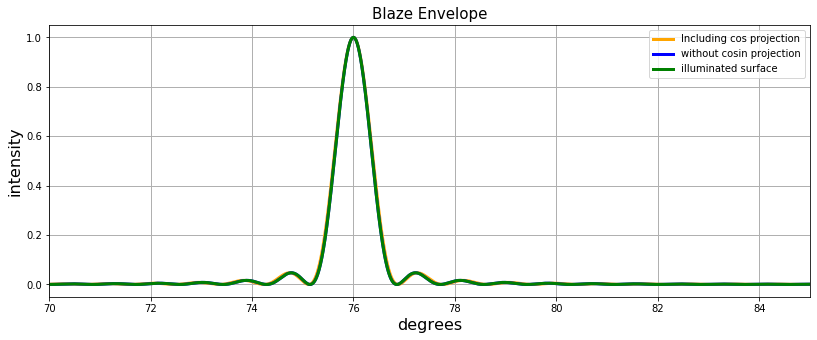

In [16]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(121)

ax1.plot(outputangle_rad*180/math.pi,BlazeEnvelopeE, color ='orange', linewidth=3.0, label='Including cos projection');
ax1.plot(outputangle_rad*180/math.pi,BlazeEnvelopeEX, color ='blue', linewidth=3.0,label='without cosin projection');
ax1.plot(outputangle_rad*180/math.pi,BlazeEnvelopeEH, color ='green', linewidth=3.0,label='illuminated surface');
plt.title('Blaze Envelope'.format(np.rad2deg(blazeangle)),size = 15)
plt.xlabel('degrees',size = 16)
plt.ylabel('intensity',size = 16)
plt.grid(linestyle='-', linewidth=1)
plt.legend(loc = 'upper right')

plt.xlim(70,85)


In [17]:
# fig = plt.figure(figsize=(30,5))
# ax1 = fig.add_subplot(121)

# ax1.plot(outputangle_rad*180/math.pi,BlazeEnvelopeE, color ='orange', linewidth=5.0);
# plt.title('Blaze Envelope'.format(np.rad2deg(blazeangle)),size = 15)
# plt.grid(linestyle='-', linewidth=1)
# plt.xlabel('degrees',size = 16)
# plt.ylabel('intensity',size = 16)
# plt.xlim(70,85)


In [17]:
# plt.figure(figsize=(16, 7))
# # plt.plot(outputangle_rad*180/math.pi,total_blazed_diffraction);
# plt.plot(outputangle_rad*180/math.pi,BlazeEnvelope, color ='orange', linewidth=5.0);
# plt.xlabel('Output [Degrees]',size = 15)
# plt.xticks(size = 15)

# plt.grid(linestyle='-', linewidth=1)

# # plt.title('beam diffraction for m ={}'.format(m))
# plt.title('Engmans Blaze Envelope for blaze = {} degrees'.format(np.rad2deg(blazeangle)),size = 15)
# plt.ylabel('Normalized Intensity',size = 15)
# plt.yticks(size = 15)

# # plt.xlim(65,85)


(65, 85)

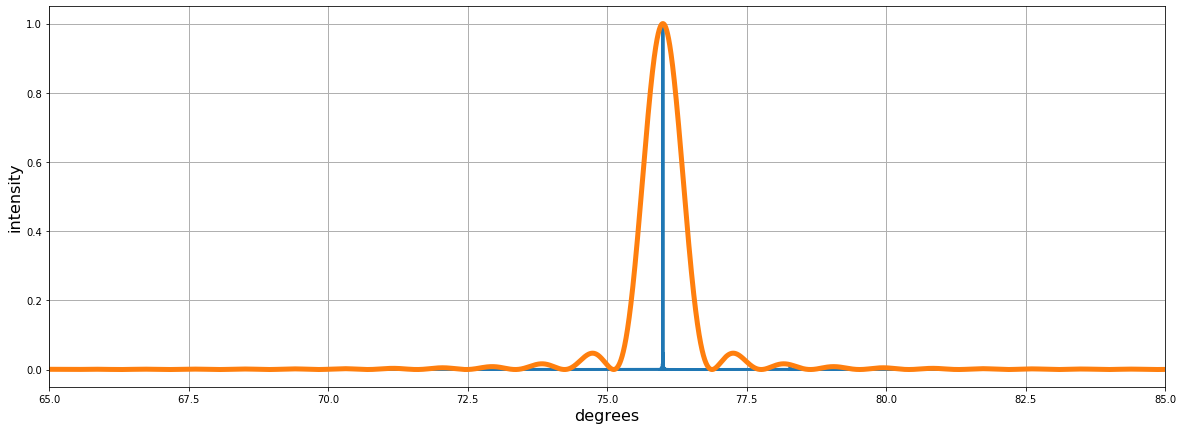

In [18]:
plt.figure(figsize=(20, 7))
plt.plot(outputangle_rad*180/math.pi,total_blazed_diffractionE, linewidth=3.0);
plt.plot(outputangle_rad*180/math.pi,BlazeEnvelopeE,linewidth=5.0);
plt.xlabel('degrees',size = 16)
plt.ylabel('intensity',size = 16)

plt.grid(linestyle='-', linewidth=1)

#plt.title('beam diffraction for m ={}'.format(m))
plt.xlim(65,85)

# Comparing data to model

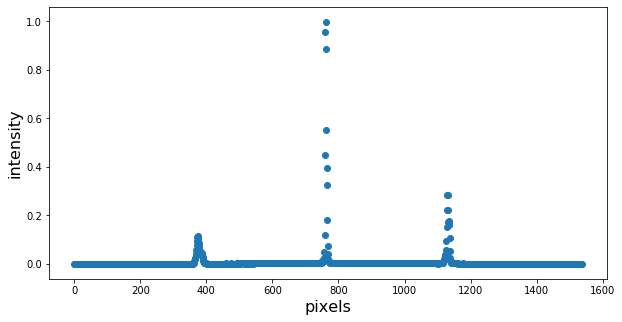

In [19]:
plt.figure(figsize=(10,5))
df = pd.read_csv("experiment01.txt", delimiter="\t",skiprows = 3) #names=["A", "B"])
df.columns = ["Pixel", "Counts", "Ncounts", "nothing"]
plt.xlabel('pixels',size = 16)
plt.ylabel('intensity',size = 16)
plt.scatter(df['Pixel'], df['Ncounts'])
# plt.yscale("log")
plt.show()

plotting data above against the model:

pixel scale should be:

In [29]:
pixsize = 9/1000 #mm
focallen = 135 #mm
numberpixels = 512#1536 #number of 9um pixels across array

platescale = pixsize/focallen
noDegacrossarrayface = np.rad2deg(platescale)*numberpixels
# noDegacrossarrayface

# # 130/76
print(np.rad2deg(platescale), 'degrees/pixel')
print(1/np.rad2deg(platescale), 'pixels/degree')

1.9556959407132097
0.0038197186342054878 degrees/pixel
261.79938779914943 pixels/degree


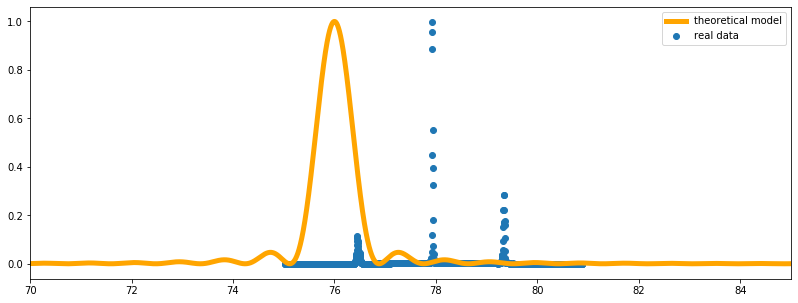

In [27]:
#Then plot them together:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(121)

#include plate scale:
pixelsperdegree = np.rad2deg(platescale)
#Include offset: Blaze - (degrees/array)/2:
offset = 76 - (noDegacrossarrayface/2)

ax1.scatter((df['Pixel']*pixelsperdegree)+offset, df['Ncounts'], label = 'real data')
ax1.plot(outputangle_rad*180/math.pi,BlazeEnvelopeE, color ='orange', linewidth=5.0,label = 'theoretical model');
plt.xlim(70,85)
plt.legend(loc='upper right');
plt.show()

Normalizing my own data w/o excel: (WIP)

In [22]:
# plt.figure(figsize=(15,10))
# df = pd.read_csv("experiment03.txt", delimiter="\t",skiprows = 3)
# df.columns = ["Pixel", "Value"]

# minimum = df['Value'].min()
# maximum = df['Value'].max()

# new = df['Value']-minimum/maximum
# minimum
# df['Value']
# # maximum
# new

# plt.scatter(df['Pixel'], new) ##why isnt this normalizing????
# plt.show()

In [23]:
# df['Value']

In [24]:
# new = df['Value']-minimum/maximum

In [25]:
# df['Value']